### Visualização e Exploração de dados

### Exemplo: Dados de Performance de 100 Estudantes nos Estados Unidos

Os dados estão presentes no kaggle: https://www.kaggle.com/dariushatesteemo/factor-student-performance-affecting
Descrição:

AS – Nota média

Gender - M se for masculino, F se feminino

ParEd – Tempo gasto pelos pais com suas crianças focado em seus estudos (P - Abaixo da média, M - Tempo médio, G - Acima da Média)

HoursKids – Tempo gasto pelos pais com suas crianças semanalmente

GradesImport - Se os pais acreditam que as notas são importantes ou não (S para sim, N para não)

In [39]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%matplotlib inline

In [27]:
# Leitura dos dados
student = pd.read_csv('StudentData.csv')

student.head()

,ASReading2,ASMath2,ASScience2,ASReading1,ASMath1,ASScience1,Gender,ParEd,HoursKids,GradestImport
0,9,7,10,8,5,6,0,1,4,0
1,29,27,30,25,25,26,0,3,31,1
2,13,11,14,9,9,10,0,1,9,0
3,24,22,25,20,20,21,0,3,23,0
4,26,24,27,22,22,23,0,3,29,0


In [35]:
### Vamos focar nas notas de Ciência 1
data = student.iloc[:,5:10]
data.head()

,ASScience1,Gender,ParEd,HoursKids,GradestImport
0,6,0,1,4,0
1,26,0,3,31,1
2,10,0,1,9,0
3,21,0,3,23,0
4,23,0,3,29,0


In [36]:
len(data)

100

In [37]:
# import sweetviz library
import sweetviz as xx

# analisando os dados do banco
study_report = xx.analyze(data)

# Gerar relatório
study_report.show_html('Dados_banco.html')


Report Dados_banco.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [38]:
data.describe()

,ASScience1,Gender,ParEd,HoursKids,GradestImport
count,100.000000,100.00,100.000000,100.000000,100.00
mean,16.140000,0.45,2.070000,15.740000,0.55
std,7.792796,0.50,0.807227,9.482168,0.50
min,2.000000,0.00,1.000000,2.000000,0.00
25%,10.000000,0.00,1.000000,7.000000,0.00
50%,15.000000,0.00,2.000000,14.000000,1.00
75%,23.000000,1.00,3.000000,25.000000,1.00
max,32.000000,1.00,3.000000,33.000000,1.00


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ASScience1', ylabel='Density'>

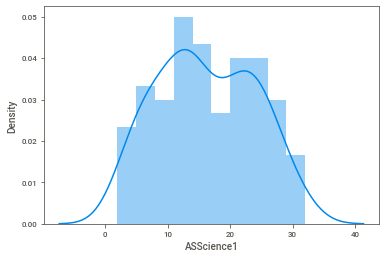

In [44]:
sns.distplot(data['ASScience1'], bins=10)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HoursKids', ylabel='Density'>

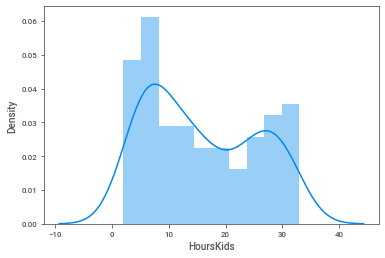

In [45]:
sns.distplot(data['HoursKids'], bins=10)

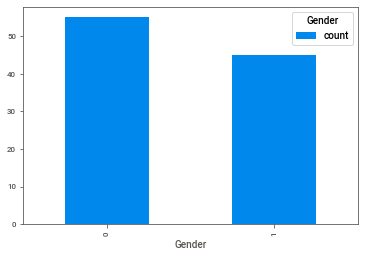

In [49]:
# Tabela de frequências absolutas

tab = pd.crosstab(index=data['Gender'], columns='count')

tab

tab.plot.bar()
plt.legend(title='Sexo')

plt.show()

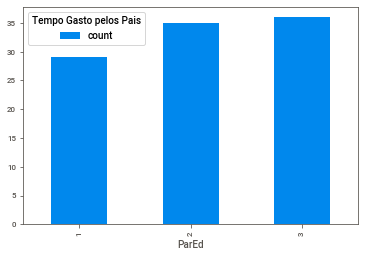

In [50]:
# Tabela de frequências absolutas

tab = pd.crosstab(index=data['ParEd'], columns='count')

tab

tab.plot.bar()
plt.legend(title='Tempo Gasto pelos Pais')

plt.show()

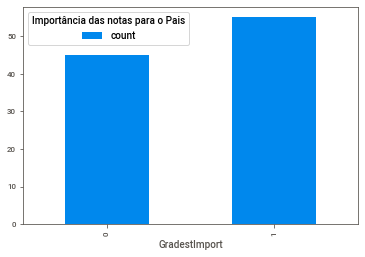

In [54]:
# Tabela de frequências absolutas

tab = pd.crosstab(index=data['GradestImport'], columns='count')

tab

tab.plot.bar()
plt.legend(title='Importância das notas para o Pais')

plt.show()

<AxesSubplot:xlabel='ASScience1'>

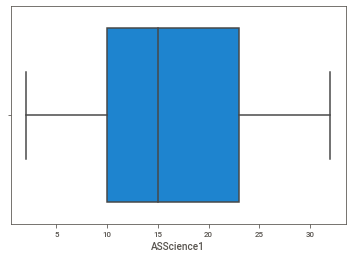

In [56]:
sns.boxplot(x=data['ASScience1'],orient='h')

In [60]:
# Tabela de dupla entrada

tabela_dupla = pd.crosstab(index=data['Gender'], columns=data['ParEd'])

tabela_dupla

ParEd,1,2,3
Gender,,,
0,17,17,21
1,12,18,15


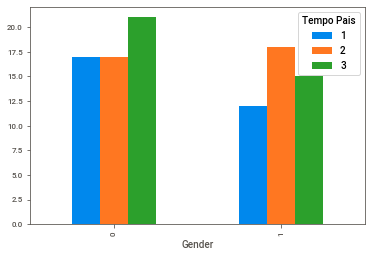

In [63]:
tabela_dupla.plot.bar()

plt.legend(title='Tempo Pais')

plt.show()

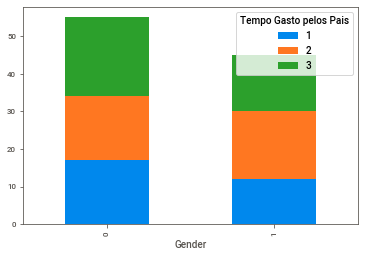

In [64]:
tabela_dupla.plot.bar(stacked=True)

plt.legend(title='Tempo Gasto pelos Pais')

plt.show()

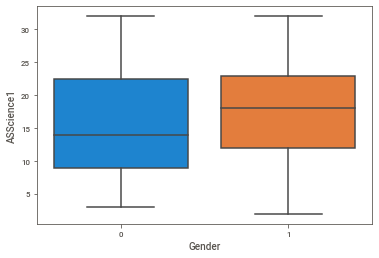

In [65]:
ax = sns.boxplot(x='Gender', y='ASScience1', data=data)

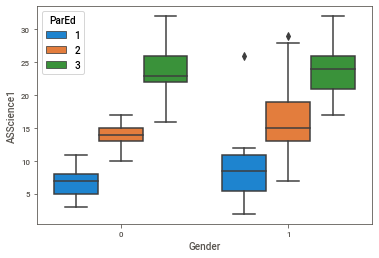

In [66]:
ax = sns.boxplot(x='Gender', y='ASScience1',hue='ParEd', data=data)

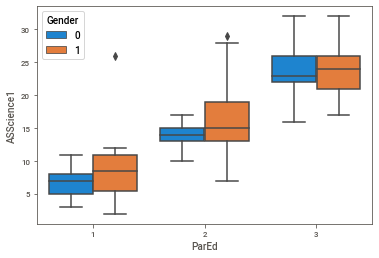

In [67]:
ax = sns.boxplot(x='ParEd', y='ASScience1',hue='Gender', data=data)

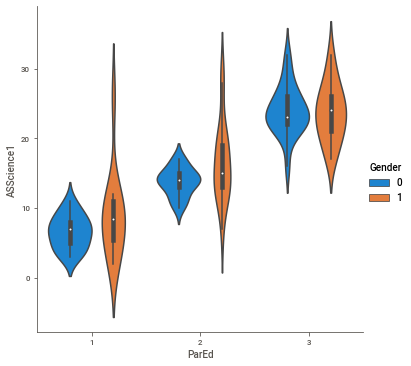

In [69]:
ax = sns.catplot(x='ParEd', y='ASScience1',hue='Gender', kind ='violin', data=data)

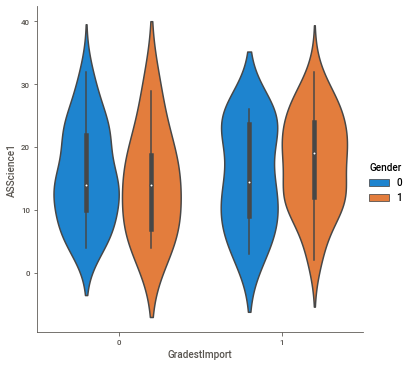

In [71]:
ax = sns.catplot(x='GradestImport', y='ASScience1',hue='Gender', kind ='violin', data=data)

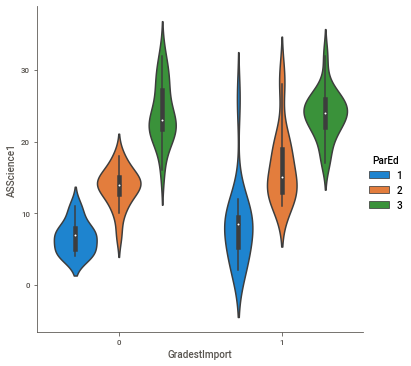

In [72]:
ax = sns.catplot(x='GradestImport', y='ASScience1',hue='ParEd', kind ='violin', data=data)

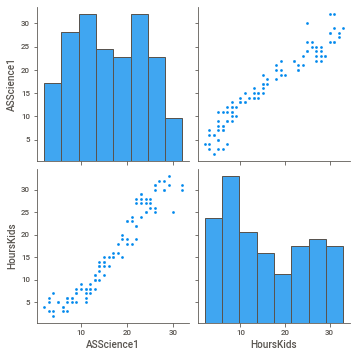

In [75]:
sns.pairplot(data[['ASScience1','HoursKids']])

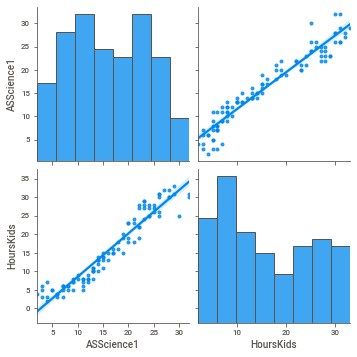

In [76]:
sns.pairplot(data[['ASScience1','HoursKids']],kind='reg')